# Import Packages

In [1]:
# built-in
import os
from os import path

# third-party (install required)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('ticks')

# Setup

## QC Thresholds

In [2]:
min_pct_aligned = 40 # Minimum percent of reads aligned to genome
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

<font size="4">Show files in the organism directory</font>

In [3]:
org_dir = path.join('../data/precise1k/')
os.listdir(org_dir)

['multiqc_stats.csv',
 'log_tpm_qc.csv',
 'log_tpm_norm_qc.csv',
 'metadata_qc.csv',
 'metadata.csv',
 'log_tpm.csv']

<font size="4">Enter name of curated metadata file here</font>

In [4]:
metadata_file = "metadata.csv"

## Load expression data

The latest NextFlow download pulled all of the public E. coli data as well; so I one-time just wiped all of the columns from the log_tpm file that aren't in the metadata

In [5]:
DF_log_tpm = pd.read_csv(path.join(org_dir,'log_tpm.csv'),index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 4211
Number of samples: 1071


In [6]:
DF_log_tpm.head()

,ecoli_00001,ecoli_00002,ecoli_00003,ecoli_00004,ecoli_00005,ecoli_00006,ecoli_00007,ecoli_00008,ecoli_00009,ecoli_00010,...,phage__lbmm_phage_t15__1,phage__lbmm_phage_t15__2,phage__lbmm_t00__1,phage__lbmm_t00__2,phage__lbmm_t05__1,phage__lbmm_t05__2,phage__lbmm_t10__1,phage__lbmm_t10__2,phage__lbmm_t15__1,phage__lbmm_t15__2
b0002,10.260569,10.368555,11.193605,11.404163,10.497016,10.235690,9.477470,9.811860,10.735874,10.726916,...,6.152594,4.501784,6.620626,5.271378,7.571744,5.032734,7.223320,4.883366,6.262659,4.473436
b0003,9.920277,10.044224,11.045580,11.460140,10.374823,10.216922,9.219235,9.861262,10.528432,10.503092,...,6.692826,5.161319,6.854957,6.912077,7.369071,5.618411,7.890765,5.993041,6.921499,5.191694
b0004,9.936694,10.010638,9.976798,10.330368,9.876910,9.638754,8.258753,8.650959,9.739519,9.722997,...,6.712330,5.005903,6.294820,6.473652,6.762686,5.292438,7.556797,5.630612,6.692529,5.155558
b0005,7.027515,7.237449,6.014337,5.854519,6.950936,6.768425,5.011006,5.137711,6.745798,6.497823,...,3.301666,1.824289,3.529972,3.671523,4.058700,3.183962,3.762897,3.010572,3.173887,3.153984
b0006,6.537183,6.452699,6.371349,6.387164,6.321764,6.405053,6.286808,6.491897,6.460234,6.467135,...,6.390222,5.903286,6.106229,8.228838,6.838934,7.579310,6.601910,6.723679,6.300758,5.986767


## Load QC data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [7]:
DF_qc_stats = pd.read_csv(path.join(org_dir,'multiqc_stats.csv'),index_col=0)
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 949


In [8]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
Sample,,,,,,,,,,,,,,,,,,,,,
ecoli_00001,6372886,4580249,53735,229666,0,0,0,0,164385,0,...,6496162,201381022,10060007,188572802,6.360192,0.0399,0.4468,0.5133,0.0,0.0
ecoli_00002,4346353,3183361,26600,199565,0,0,0,0,85094,0,...,4394188,136219828,6035575,128348546,5.778367,0.0409,0.4453,0.5138,0.0,0.0
ecoli_00003,11421794,8766514,5167,179345,0,0,0,0,12511,0,...,11445313,354804703,6338224,346636233,2.302244,0.0261,0.5113,0.4626,0.0,0.0
ecoli_00004,10539531,7948124,2907,131778,0,0,0,0,4468,0,...,10563549,327470019,6001546,319757327,2.355236,0.0234,0.5314,0.4452,0.0,0.0
ecoli_00005,10713890,8153912,1176,562512,0,0,0,0,41191,0,...,10848313,336297703,8690930,325858317,3.104210,0.0314,0.4550,0.5135,0.0,0.0


## Load metadata

In [9]:
DF_metadata = pd.read_csv(path.join(org_dir,metadata_file),index_col=0)
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 1071


,sample_id,study,project,condition,rep_id,contact,creator,run_date,Strain Description,Strain,...,phase,OD,additional_notes,sample_id.1,batch_zinc,feed_zinc,Swift,Organism,LibraryLayout.1,Platform.1
ecoli_00001,control__wt_glc__1,Control,control,wt_glc,1,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecoli_00002,control__wt_glc__2,Control,control,wt_glc,2,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecoli_00003,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecoli_00004,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecoli_00005,fur__wt_fe__1,Fur,fur,wt_fe,1,Sangwoo Seo,Sangwoo Seo,9/5/13,Escherichia coli K-12 MG1655,MG1655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Double-check Samples Present in All DFs 

In [10]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
# skip this check; we don't have the QC stats for DDB
#assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

# Check statistics

## FastQC stats

In [11]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

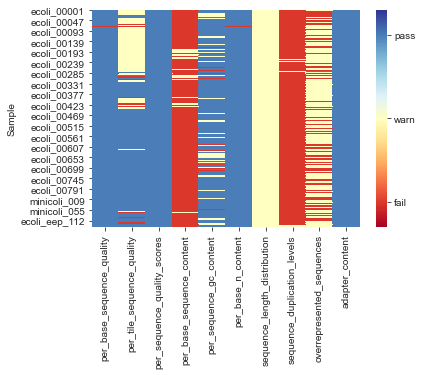

In [12]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [13]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [14]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] == 'fail').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
Sample,,,,
ecoli_00013,fail,warn,pass,pass
ecoli_00069,fail,pass,fail,pass
ecoli_00076,fail,pass,fail,pass


<font size="4">Mark samples as failed.</font>

In [15]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Percent of reads aligned to genome

In [16]:
min_pct_aligned

40

In [17]:
align_cols = ['Assigned']
total_alignment = DF_qc_stats[align_cols].sum(axis=1)
percent_alignment = total_alignment.divide(DF_qc_stats['Total'])*100

Text(0.5, 1.0, 'Histogram of Alignment Percentage')

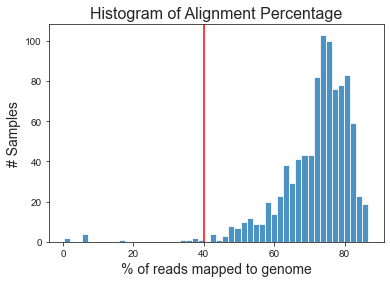

In [18]:
fig,ax = plt.subplots()
ax.hist(percent_alignment,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_pct_aligned,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('% of reads mapped to genome',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Histogram of Alignment Percentage',fontsize=16)

In [19]:
DF_failed_mapping = DF_qc_stats[percent_alignment < min_pct_aligned]
DF_failed_mapping

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
Sample,,,,,,,,,,,,,,,,,,,,,
ecoli_00151,3906008,1537833,1479914,55929,0,0,0,0,9857,0,...,3922738,137295830,143152,135630362,1.213051,0.4081,0.3212,0.2707,0.0,0.0
ecoli_00156,4833809,14785,3893423,251465,0,0,0,0,3031,0,...,4841148,726172200,1536519,656317481,9.619580,0.8505,0.0637,0.0858,0.0,0.0
ecoli_00367,6409073,2396849,2999202,80540,0,0,0,0,105408,0,...,6415979,256639160,564443,253273411,1.311471,0.0360,0.2346,0.7294,0.0,0.0
ecoli_00403,4837452,809302,3361607,175788,0,0,0,0,47770,0,...,4846082,489454282,2006772,485061325,0.897521,0.0611,0.1761,0.7627,0.0,0.0
ecoli_00726,9009414,31284,3668370,859929,0,0,0,0,27719,0,...,9033164,682613640,2339290,678983256,0.531836,0.4545,0.1599,0.3857,0.0,0.0
ecoli_00799,4206750,1593431,416287,97804,0,0,0,0,12376,0,...,4208394,214628094,221755,212514750,0.984654,0.0605,0.5627,0.3768,0.0,0.0
ecoli_00800,6136173,2135300,1522795,234165,0,0,0,0,23901,0,...,6138877,313082727,152877,310451375,0.840465,0.0507,0.4412,0.5081,0.0,0.0
minicoli_005,2898115,1052668,160744,1214712,0,0,0,0,22273,0,...,2910024,125131032,142300,123488083,1.312983,0.2379,0.3040,0.4581,0.0,0.0
ecoli_eep_005,12188565,726829,10586,10993290,0,0,0,0,110259,0,...,12242707,1236513407,475939,1226959357,0.772660,0.0582,0.4054,0.5364,0.0,0.0


In [20]:
DF_metadata['passed_pct_reads_mapped'] = ~DF_metadata.index.isin(DF_failed_mapping.index)

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [21]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

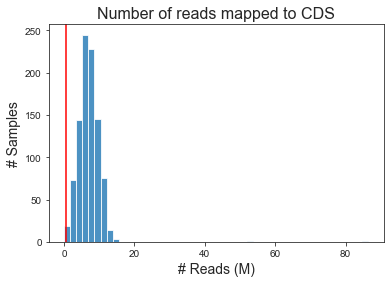

In [22]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [23]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
Sample,,,,,,,,,,,,,,,,,,,,,
ecoli_00156,4833809,14785,3893423,251465,0,0,0,0,3031,0,...,4841148,726172200,1536519,656317481,9.619580,0.8505,0.0637,0.0858,0.0,0.0
ecoli_00726,9009414,31284,3668370,859929,0,0,0,0,27719,0,...,9033164,682613640,2339290,678983256,0.531836,0.4545,0.1599,0.3857,0.0,0.0


<font size="4">Mark samples as failed.</font>

In [24]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [25]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  4


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

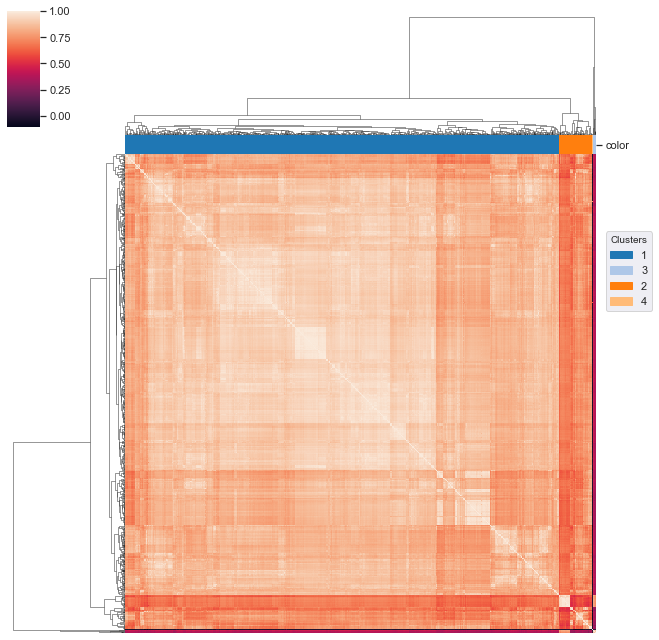

In [26]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

<font size="4">Select clusters to remove.</font>

In [27]:
#indicate which clusters you want to remove
remove_clst = [3,4]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [28]:
clst[clst.cluster.isin(remove_clst)]

,cluster,color
ecoli_00156,3,"(0.6823529411764706, 0.7803921568627451, 0.909..."
ecoli_00726,4,"(1.0, 0.7333333333333333, 0.47058823529411764)"
minicoli_001,3,"(0.6823529411764706, 0.7803921568627451, 0.909..."
minicoli_002,3,"(0.6823529411764706, 0.7803921568627451, 0.909..."
minicoli_003,3,"(0.6823529411764706, 0.7803921568627451, 0.909..."
minicoli_004,3,"(0.6823529411764706, 0.7803921568627451, 0.909..."
minicoli_005,3,"(0.6823529411764706, 0.7803921568627451, 0.909..."


In [29]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [30]:
DF_metadata.head()

,sample_id,study,project,condition,rep_id,contact,creator,run_date,Strain Description,Strain,...,phase,OD,additional_notes,sample_id.1,batch_zinc,feed_zinc,Swift,Organism,LibraryLayout.1,Platform.1
ecoli_00001,control__wt_glc__1,Control,control,wt_glc,1,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecoli_00002,control__wt_glc__2,Control,control,wt_glc,2,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecoli_00003,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecoli_00004,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecoli_00005,fur__wt_fe__1,Fur,fur,wt_fe,1,Sangwoo Seo,Sangwoo Seo,9/5/13,Escherichia coli K-12 MG1655,MG1655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Remove failed samples

In [31]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [32]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

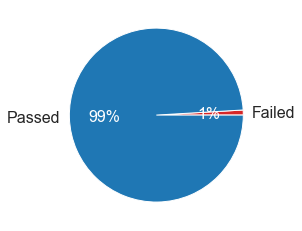

In [33]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

## Compute Pearson R Score

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. </font>

In [34]:
from tqdm import tqdm_notebook as tqdm
import itertools
from scipy import stats

In [35]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project'].str.cat(
    DF_metadata_passed.loc[:,'condition'],sep=':'
)

<ipython-input-35-6e5939fbe8e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project'].str.cat(


In [36]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

<ipython-input-36-34f92533bdf4>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):


Median Pearson R between replicates: 0.99


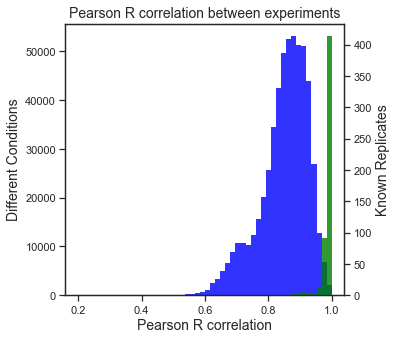

In [37]:
sns.set_style('ticks')

fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [38]:
dissimilar = []
print('Most dissimilar replicates:')
for x in [(k,v) for k,v in rep_corrs.items() if v < 0.95]:
    print(x)
    dissimilar.append(x[0][0])
    dissimilar.append(x[0][1])
dissimilar = set(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)
#Changed condition ID to index

Most dissimilar replicates:
(('ecoli_00566', 'ecoli_00568'), 0.9140513341255164)
(('ecoli_00566', 'ecoli_00569'), 0.9152791596209279)
(('ecoli_00567', 'ecoli_00568'), 0.9044826118912478)
(('ecoli_00567', 'ecoli_00569'), 0.9060256117910159)
(('ecoli_00584', 'ecoli_00586'), 0.9231600465523583)
(('ecoli_00584', 'ecoli_00587'), 0.9154866192879149)
(('ecoli_00585', 'ecoli_00586'), 0.9178018650978331)
(('ecoli_00585', 'ecoli_00587'), 0.909739115726883)
(('ecoli_eep_005', 'ecoli_eep_006'), 0.9014693668974038)
(('ecoli_eep_007', 'ecoli_eep_008'), 0.8546273518019206)
(('phage__lbmm_phage_t00__1', 'phage__lbmm_phage_t00__2'), 0.878024069104941)
(('phage__lbmm_phage_t05__1', 'phage__lbmm_phage_t05__2'), 0.9039145687020259)
(('phage__lbmm_phage_t10__1', 'phage__lbmm_phage_t10__2'), 0.9364201670444894)
(('phage__lbmm_phage_t15__1', 'phage__lbmm_phage_t15__2'), 0.9318253447521453)
(('phage__lbmm_t00__1', 'phage__lbmm_t00__2'), 0.8821659798136701)
(('phage__lbmm_t05__1', 'phage__lbmm_t05__2'), 0.8953

<ipython-input-38-574184cd5ab6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)


In [65]:
np.std([v for k, v in rep_corrs.items() if 'phage' in k[0]])

0.02368584468056404

# Correlations between replicates

In [39]:
DF_metadata_passed_input = DF_metadata_passed[DF_metadata_passed['passed_similar_replicates']]

<font size=4> First, get a full sample name </font>

In [40]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [41]:
# Drop Samples with no replicates
cond_counts = DF_metadata_passed_input.condition.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
print(len(drop_conds))
drop_conds

53


Index(['bw_delmntr', 'glu_ale6', 'xyl_ale2', 'wt_044', 'wt_42c', 'glc_ale2',
       'glyc_ale2', 'PD-009_del-tnaA_Batch_6h', 'rpoBE546V_044', 'glc_ac_ac2',
       'glu_ale3', 'glc_ale1', 'PD-004_del-qseB_Batch_6h', '42c_ale2',
       'xyl_ale3', 'glu_ale10', 'bw_delnac_glc', 'rpoBE546V_031', '42c_ale6',
       'delgadx_ph5', 'wt_xyl', 'glc_glyc_glyc', '42c_ale1', 'glu_ale5',
       '42c_ale3', 'glc_xyl_glc', 'bw_delcra_glc', 'glyc_ale1', 'wt_031',
       'PD-009_del-baeR_Fed-batch_18h', 'wt_ade', 'glc_glyc_glc', 'glu_ale8',
       'nitr_031', 'sdh_ale2', '5drib_ale10', 'lyx_ale2_f6', 'bw_delnac_ade',
       'glc_ac_glc1', '42c_ale5', '42c_ale10', 'wt_trp', '42c_ale8',
       'rpoBE546V_glc', 'glu_ale9', 'PD-009_del-tnaA_Fed-batch_6h', 'glc_ale3',
       'bw_delcra_trp', '42c_ale4', 'glc_xyl_xyl', 'xyl_ale1', '42c_ale9',
       'pgi_ale2'],
      dtype='object')

In [42]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_id.isin(drop_conds)

# Remove failed samples

In [43]:
qc_columns = ['passed_similar_replicates']

In [44]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

We've determined that the putrescine project has serious issues, let's drop it entirely here:

In [45]:
DF_metadata_final = DF_metadata_final[DF_metadata_final['project'] != 'ptrc_reg']

In [46]:
DF_metadata_final.shape

(1033, 115)

In [47]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

# Remove Small Genes and low FPM
(<100nt)

In [49]:
gene_info = pd.read_csv('../data/annotation/gene_info.csv', index_col=0)

short_genes = gene_info[(gene_info.end-gene_info.start+1)<100].index.to_list()

print(len(short_genes))
short_genes[0:5]

66


['b0001', 'b0075', 'b4726', 'b4727', 'b4728']

In [50]:
# use biorxiv PRECISE 2.0 counts to get low-count genes - should still do the trick
counts = pd.read_csv('../data/precise2/counts.csv', index_col=0)

counts.head(2)

,ecoli_00178,ecoli_00188,ecoli_00825,ecoli_00057,ecoli_00471,ecoli_00215,ecoli_00270,ecoli_00100,ecoli_00019,ecoli_00837,...,ecoli_00393,ecoli_00800,ecoli_00195,ecoli_00265,ecoli_00037,ecoli_00419,ecoli_00567,ecoli_00784,ecoli_00544,ecoli_00338
Geneid,,,,,,,,,,,,,,,,,,,,,
b0001,1033,64,1079,464,19,1515,52,761,13,477,...,258,435,363,372,5,238,677,101,48,385
b0002,4831,47376,29852,4125,715,36396,13114,15639,3164,45157,...,16736,6609,34432,22045,7387,25654,32192,19660,1827,56611


In [51]:
fpm = counts.divide(counts.sum(axis=0)) * (10**6)
fpm.head(2)

,ecoli_00178,ecoli_00188,ecoli_00825,ecoli_00057,ecoli_00471,ecoli_00215,ecoli_00270,ecoli_00100,ecoli_00019,ecoli_00837,...,ecoli_00393,ecoli_00800,ecoli_00195,ecoli_00265,ecoli_00037,ecoli_00419,ecoli_00567,ecoli_00784,ecoli_00544,ecoli_00338
Geneid,,,,,,,,,,,,,,,,,,,,,
b0001,175.274785,5.256807,191.287196,142.556361,5.047808,169.832825,8.696096,215.131459,2.001814,55.115122,...,40.528103,203.718447,51.317742,44.647460,1.561809,33.781602,79.520490,15.467144,7.961227,46.077434
b0002,819.702311,3891.351329,5292.220000,1267.338341,189.956987,4080.023434,2193.088443,4421.078699,487.210644,5217.680469,...,2628.985794,3095.115440,4867.692824,2645.842067,2307.416468,3641.316035,3781.275661,3010.733126,303.024222,6775.297708


In [52]:
# Check sum of column is 10^6
fpm['ecoli_00001'].sum()

1000000.0

In [53]:
low_fpm_genes = fpm.loc[fpm.max(axis=1) < 10].index.to_list()

In [54]:
drop_genes = list(dict.fromkeys(low_fpm_genes + short_genes)) # dict.fromkeys step removes duplicates

len(drop_genes)

144

In [55]:
DF_log_tpm_final

,ecoli_00001,ecoli_00002,ecoli_00003,ecoli_00004,ecoli_00005,ecoli_00006,ecoli_00007,ecoli_00008,ecoli_00009,ecoli_00010,...,DDB3__PD-006_del-rpoS_Batch_9h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__1,DDB3__PD-006_del-rpoS_Fed-batch_6h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__3,DDB3__PD-006_del-rpoS_Fed-batch_15h__1,DDB3__PD-006_del-rpoS_Fed-batch_15h__2,DDB3__PD-009_del-tnaA_Batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__2
b0002,10.260569,10.368555,11.193605,11.404163,10.497016,10.235690,9.477470,9.811860,10.735874,10.726916,...,9.446533,8.302502,8.452109,8.363976,8.672402,8.647693,9.675175,8.761815,8.421964,8.483203
b0003,9.920277,10.044224,11.045580,11.460140,10.374823,10.216922,9.219235,9.861262,10.528432,10.503092,...,8.480662,7.449754,7.467061,7.538769,7.723832,7.670143,8.857956,7.922229,7.633727,7.859478
b0004,9.936694,10.010638,9.976798,10.330368,9.876910,9.638754,8.258753,8.650959,9.739519,9.722997,...,9.282031,8.281564,8.364711,8.249902,8.597246,8.722178,9.444481,8.395833,8.590145,8.446588
b0005,7.027515,7.237449,6.014337,5.854519,6.950936,6.768425,5.011006,5.137711,6.745798,6.497823,...,4.206849,2.505517,3.065065,4.168111,4.056920,4.030515,4.921936,3.311463,2.568554,4.185822
b0006,6.537183,6.452699,6.371349,6.387164,6.321764,6.405053,6.286808,6.491897,6.460234,6.467135,...,6.685477,5.876201,6.319561,6.177592,6.028610,6.324962,6.092354,5.578950,5.690213,5.635963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4399,4.132728,4.054949,4.366317,4.199012,4.033244,4.100060,4.205955,3.962099,4.373597,4.106327,...,4.129548,3.499303,3.646047,3.210447,3.059382,4.016907,4.163444,3.635774,3.672215,3.857527
b4400,2.031758,2.669232,3.010075,3.093578,2.640199,2.591472,2.852459,2.687484,2.648483,2.743234,...,2.727573,3.033680,2.977242,2.930798,3.384542,3.235636,2.310320,3.232492,2.935584,3.487490
b4401,9.303645,9.230371,10.325312,10.393728,9.214362,9.137161,10.389686,10.310837,9.305880,9.272767,...,9.299149,9.514939,9.419433,9.557415,9.439562,9.367061,9.929596,10.471150,10.246559,10.474677
b4402,3.811704,3.541410,3.734501,3.529305,3.550265,4.094210,3.567537,3.158983,3.949410,4.016299,...,3.434435,4.794347,4.601880,5.035071,5.398829,4.100817,5.451155,4.491318,5.007507,5.817840


In [56]:
DF_log_tpm_final = DF_log_tpm_final.drop(index=drop_genes, errors='ignore')
DF_log_tpm_final.shape

(4211, 1033)

# Save final datasets

<font size=4> Choose a condition as the reference condition. Ideally, this would be the WT strain, grown in the most common base media for your organism. Defined media like M9 or MOPS are preferred, but many organisms only grow on rich media such as LB. </font>

In [57]:
# List all replicates for the reference condition
reference = ['ecoli_00001','ecoli_00002']

In [58]:
# Subtract mean expression of reference from entire dataset
DF_log_tpm_norm = DF_log_tpm_final.sub(DF_log_tpm_final[reference].mean(axis=1),axis=0)

In [59]:
DF_log_tpm_final.to_csv(os.path.join(org_dir,'log_tpm_qc.csv'))
DF_log_tpm_norm.to_csv(os.path.join(org_dir,'log_tpm_norm_qc.csv'))
DF_metadata_final.to_csv(os.path.join(org_dir,'metadata_qc.csv'))